# Arboria Demo

Importing useful libs :

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Classification

Importing arboria :

In [2]:
from arboria import DecisionTreeClassifier, RandomForestClassifier, accuracy

Creating dataset :

In [3]:
bc = load_breast_cancer()
X = bc.data.astype(np.float32)  
y = bc.target.astype(np.int32) 

print("Breast Cancer Wisconsin Dataset")
print(f"Number of samples : {X.shape[0]}")
print(f"Number of features : {X.shape[1]}")

Breast Cancer Wisconsin Dataset
Number of samples : 569
Number of features : 30


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=10)

### DecisionTree

DecisionTree with default hyperparameters
- **max_depth** by default is set to None (no depth limits)
- **min_sample_split** by default is set to None (no minimum sample per leaf limit)

In [5]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train, criterion="gini")

In [6]:
train_pred = tree.predict(x_train)
training_acc = accuracy(train_pred, y_train)

In [7]:
tree_pred = tree.predict(x_test)
testing_acc = accuracy(tree_pred, y_test)

In [8]:
print("DecisionTree :")
print(f"Training accuracy : {training_acc:.2f}")
print(f"Testing accuracy : {testing_acc:.2f}")

DecisionTree :
Training accuracy : 1.00
Testing accuracy : 0.92


With no depth limit and no constraint on the minimum number of samples per leaf, decision tree models tend to overfit

#### DecisionTree with hyperparameters

In [9]:
param_tree = DecisionTreeClassifier(max_depth=5, min_sample_split=10)
param_tree.fit(x_train, y_train)

In [10]:
train_pred = param_tree.predict(x_train)
training_acc = accuracy(train_pred, y_train)

test_pred = param_tree.predict(x_test)
testing_acc = accuracy(test_pred, y_test)

In [11]:
print("DecisionTree with hyperparameters :")
print(f"Training accuracy : {training_acc:.2f}")
print(f"Testing accuracy : {testing_acc:.2f}")

DecisionTree with hyperparameters :
Training accuracy : 0.98
Testing accuracy : 0.97


### RandomForest

In [12]:
rf = RandomForestClassifier(
    n_estimators= 80,
    max_depth= 10, 
    max_features=6,
    max_samples= 0.9,
    min_sample_split=10,
    seed=10
)


rf.fit(x_train, y_train)

In [13]:
train_pred = rf.predict(x_train)
rf_pred  = rf.predict(x_test)

training_acc = accuracy(train_pred, y_train)
testing_acc = accuracy(rf_pred, y_test)
oob = rf.out_of_bag(x_train, y_train)

print("RandomForest :")
print(f"Training accuracy : {training_acc:.2f}")
print(f"Testing accuracy : {testing_acc:.2f}")
print(f"Out-of-bag accuracy : {oob:.2f}")

RandomForest :
Training accuracy : 0.99
Testing accuracy : 0.99
Out-of-bag accuracy : 0.96


In [14]:
rf_pred_proba = rf.predict_proba(x_test)
print(f"Predicted class probability for the first test sample : {rf_pred_proba[0]:.2f}")
print(f"Actual class for the first test sample : {y_test[0]}")

Predicted class probability for the first test sample : 0.17
Actual class for the first test sample : 0


## Regression

In [15]:
from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
from arboria import RandomForestRegressor

In [17]:
X, y = make_regression(n_samples=100_000,
                       n_features=10,
                       n_informative=5, 
                       noise = 10, 
                       random_state=1)
x_train, x_test, y_train, y_test= train_test_split(X,y)

In [18]:
tree = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    n_jobs=-1,
    seed=1
    )
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred):.2f}")

MSE : 311.03916637390273
R2 score: 0.98


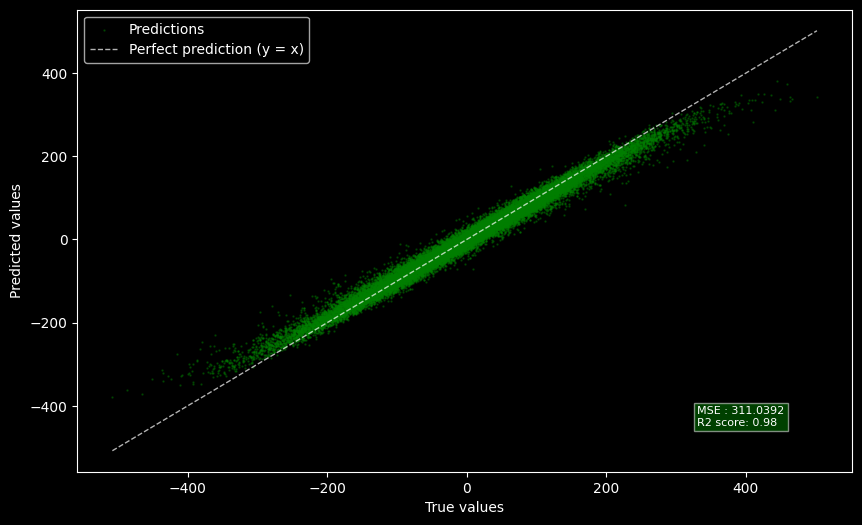

In [19]:
%matplotlib inline
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred,s=0.5, marker = "o", color= "green", label="Predictions", alpha=0.4)
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))

x = np.linspace(min_val, max_val, 200)
plt.plot(x, x, "--",  color="white", linewidth=1, label="Perfect prediction (y = x)", alpha= 0.7)

plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend()
text = (f"MSE : {mean_squared_error(y_test, y_pred):.4f}\n"
        f"R2 score: {r2_score(y_test, y_pred):.2f}")
plt.text(
    0.80, 0.1, text,
    transform=plt.gca().transAxes,
    fontsize=8,
    bbox=dict(boxstyle="square", facecolor="green", alpha=0.5)
)
plt.show()

### California Housing

In [20]:
X, y = fetch_california_housing(return_X_y=True)
x_train, x_test, y_train, y_test= train_test_split(X,y, train_size=0.7, random_state=1)

print("California Housing")
print(f"Number of samples : {len(X)}")
print(f"Number of features : {len(X[0])}")

California Housing
Number of samples : 20640
Number of features : 8


In [21]:
rf = RandomForestRegressor(n_estimators=400,
                           max_depth=20,
                           min_sample_split=10, 
                           max_features="sqrt", 
                           seed = 1, 
                           n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"MSE : {mean_squared_error(y_test, y_pred):.4f}")
print(f"R2 score: {r2_score(y_test, y_pred):.2f}")

MSE : 0.2477
R2 score: 0.81


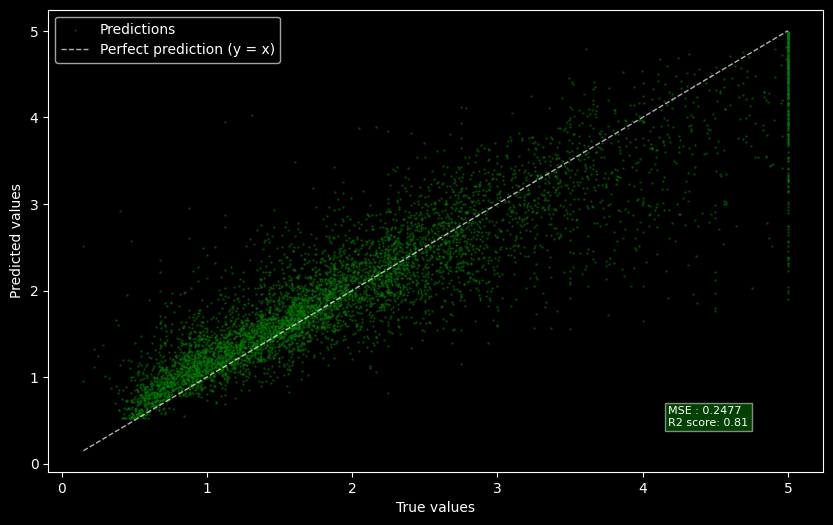

In [22]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test,y_pred,s=0.5, marker = "o", color= "green", label="Predictions", alpha=0.5)

min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))

x = np.linspace(min_val, max_val, 200)
plt.plot(x, x, "--",  color="white", linewidth=1, label="Perfect prediction (y = x)", alpha= 0.7)

plt.xlabel("True values")
plt.ylabel("Predicted values")
text = (f"MSE : {mean_squared_error(y_test, y_pred):.4f}\n"
        f"R2 score: {r2_score(y_test, y_pred):.2f}")
plt.text(
    0.80, 0.1, text,
    transform=plt.gca().transAxes,
    fontsize=8,
    bbox=dict(boxstyle="square", facecolor="green", alpha=0.5)
)

plt.legend()

plt.show()